Identificación de rostros

### Temas Principales

- Matrices

## Introducción

Utilizando una base de datos, con rostros de personas (datos de _entrenamiento_ ) es posible preparar un **modelo** que ayude a identificar rostros en un nuevo conjunto de datos con rostros de personas (datos de _prueba_ ). La técnica que se va a utilizar en este proyecto, está basada en la idea de encontrar un conjunto de _eigenvectores_ para cada persona y luego utilizarlo para **clasificar** nuevos rostros.

La idea fue presentada originalmente por Sirovich y Kirby en 1987 (**L. Sirovich and M. Kirby** (1987). _Low-dimensional procedure for the characterization of human faces_. `Journal of the Optical Society of America A 4 (3): 519–524`) e implementada por Turk  y Pentland en 1991 (**M. Turk and A. Pentland** (1991). _Face recognition using eigenfaces_. `Proc. IEEE Conference on Computer Vision and Pattern Recognition. pp. 586–591.`).

## Preguntas a responder

1. Descarga un conjunto de prueba del **LFW**, verifica que todos las imagenes están estandarizadas en tamaño y vienen en escala de grises. Tiene que haber 10 clases. Guarda estas imágenes en una carpeta llamada `originales`. Esto es muy importante, ya que los resultados deben de ser reproducibles.
2. Describe las imagenes obtenidas ¿Cuáles son las etiquetas? ¿Cuántas imágenes hay de cada etiqueta? Crea carpetas con los nombres de las etiquetas y guarda las imágenes correspondientes ahí.
3. Crea una función que muestre en una matriz de imágenes de $m \times n$ un conjunto aleatorio del conjunto de datos en `originales`.
4. Crea una función que calcule el rostro promedio de un personaje en particular. 
5. Crea una función que muestre el rostro promedio de un personaje en particular.
6. Guarda los rostros promedios en una carpeta `promedios` usando el nombre de la etiqueta.
7. De cada etiqueta, separala en dos grupos, uno de _entrenamiento_ (cada personaje con el mismo número de imagenes) y uno de _prueba_ (el restante).
8. Crea una matriz $\mathcal{M}$ con las imagenes de _entrenamiento_ puestas en un vector.
9. Calcula la matriz de **correlación** $\mathcal{C} = \mathcal{M}^T\mathcal{M}$. ¿Por qué es una matriz de correlación?
10. Obtén los primeros $30$ _vectores_ y _valores propios_ de $\mathcal{C}$.
11. Toma cada uno de los _vectores propios_ y muéstralos como imagen.
12. Muestra en una gráfica los _valores propios_ , ordenados de mayor a menor.
13. Crea una función que calcule la representación de una imagen en los _vectores propios_. Esto se hace tomando la _proyección_ de la imagen en los _vectores propios_ . ¿Por qué? 
14. Utiliza esa función con las imágenes promedio, esto te da la representación única de cada personaje. Dibuja los coeficientes de esta proyección en una gráfica, esto de da la _firma_ de cada personaje.
15. Muestra la imagen _reconstruida_ a partir de los vectores propios. 
16. Crea una función que devuelva la diferencia:

$$
E_j = \frac{||c_j - c_{nueva}||}{||c_j||}
$$

donde $c_j$ es cada una de las imágenes del personaje en el conjunto de _entrenamiento_ y $c_{nueva}$ es una imagen que no es de entrenamiento. Muestra en una gráfica la distancia por cada imagen.

17 Utiliza una [**matriz de confusión**](http://en.wikipedia.org/wiki/Confusion_matrix) para mostrar que tan efectivo es el reconocimiento de imágenes.

## Datos

Utilizar imágenes del [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/). Para obtenerlas de una manera más fácil, se puede usar la función `sklearn.datasets.fetch_lfw_people`.

Libreria caras documentacion:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

https://github.com/scikit-learn/scikit-learn/blob/0fb307bf3/sklearn/datasets/_lfw.py#L219

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/datasets/index.html#labeled-faces-in-the-wild-dataset

In [55]:
#Librerias
from sklearn.datasets import fetch_lfw_people #para descargar las imagenes
import numpy as np
import os # libreria del sistema
import shutil #para eliminar el directorio si existe
import matplotlib.pyplot as plt #Para visualizar y guardar las imagenes que tenemos
import random #para escoger la muestra
import sklearn.metrics as sk #para la matriz de confusion

In [56]:
def inicializacion(mini=150, res=.5):
    #min_faces_per_person --> minimo de cantidad de imagenes de esa persona
    #resize --> proporcion de la imagen
    #funneled --> para las imagenes estandarizadas
    #download_if_missing --> descargar las imagenes si no estan
    #data_home --> directorio cache
    #color --> color o blanco y negro
    caras = fetch_lfw_people(min_faces_per_person=mini, resize=res,  funneled=True, 
                             color=False, download_if_missing=True, data_home="data")

    #Informacion general sobre las imagenes
    #cada linea en images es una imagen (como matriz)
    num_caras, ancho, alto = caras.images.shape  

    #Data son todas las imagenes puestas como fila (los pixeles)
    #(num_caras, (ancho*alto))
    img_fila = caras.data

    #Id de nombre al que corresponde cada imagen (en orden)
    Id = caras.target

    #Nombres con el indice como Id
    nombres = caras.target_names

    #Todas las imagenes
    imagenes = caras.images
    
    return num_caras, ancho, alto, img_fila, Id, nombres, imagenes

In [57]:
def crear_directorio(nombre):
    #Creamos el directorio si existe lo eliminamos y escribimos de nuevo
    if not os.path.exists(nombre):
        os.makedirs(nombre)
    else:
        shutil.rmtree(nombre) # Borra el directorio -rf
        os.makedirs(nombre)

In [58]:
def carpetas():
    #Vamos a guardar las imagenes originales
    crear_directorio("originales")

    #Creamos una carpeta con cada nombre
    for nombre in nombres:
        os.makedirs("originales/" + nombre)

    #Recorremos cada Id de imagen para asignarla en su carpeta
    #La estamos guardando en su respectiva carpeta con el indice original
    for i in range(len(Id)):
        directory = "originales/" + str(nombres[Id[i]]) + "/" + str(i) + ".png"
        plt.imsave(directory, imagenes[i], cmap="gray")
        

In [59]:
def muestra_aleatoria():
    crear_directorio("muestra")
    crear_directorio("prueba")
    
    #Recorremos cada nombre que existe
    for nombre in nombres:
        muestra_fila=[] #muestra de imagenes en fila
        imagenes_aleatorias = random.choices(os.listdir("originales/"+nombre), k=50) #muestra aleatoria
        
        for img in imagenes_aleatorias: #Recorremos imagenes de muestra
            imagen = plt.imread("originales/"+nombre+"/"+img) #Leemos las imagenes
            imagen = imagen[:,:,0].reshape(ancho*alto) #a imagen fila
            muestra_fila.append(imagen) #agregamos la imagen
        
        np.savetxt(fname=("muestra/"+nombre+".csv"), X=muestra_fila ,delimiter=",") #Guardamos muestra csv
        
        complemento = [item for item in os.listdir("originales/"+nombre) if item not in imagenes_aleatorias]
        complemento = np.array(complemento)
        np.savetxt(fname=("prueba/"+nombre+".csv"), X=complemento ,delimiter=",", fmt='%s') #Guardamos complemento


In [60]:
def rostro_promedio():
    crear_directorio("promedios")

    for nombre in nombres: #promedio cada nombre
        im_prom = np.loadtxt(fname=("muestra/"+nombre+".csv"),delimiter=',')
        im_prom = np.mean(im_prom, axis=0).reshape(ancho,alto)
        plt.imsave("promedios/"+nombre+".png" ,im_prom, cmap="gray") #Guardammos rostro promedio png

In [61]:
def eigenfaces():
    crear_directorio("graficas-eigenvalores")
    crear_directorio("eigenfaces")
    crear_directorio("eigenfaces-csv")

    for nombre in nombres:
        media = plt.imread("promedios/"+nombre+".png") #cargamos promedio
        media = media[:,:,0].reshape(ancho*alto)
        muestra = np.loadtxt(fname=("muestra/"+nombre+".csv"),delimiter=',') #cargamos muestra
        M = muestra - media
        correlacion = np.dot(M.transpose(), M) / len(media)
        eigen = np.linalg.eigh(correlacion) #calcula eigen-vlues-vectors
        eigen_values = eigen[0]
        eigen_faces = eigen[1] #eigen_vectors
        
        matriz_eigen = []
        for i in range(1,31): #elegimos 30 eigenvectors
            matriz_eigen.append(eigen_faces[:,-i])
        matriz_eigen = np.array(matriz_eigen).transpose() #convertimos a matriz
        np.savetxt(fname=("eigenfaces-csv/"+nombre+".csv"), X=matriz_eigen ,delimiter=",") #guaradmos

        plt.scatter(range(0,29) ,eigen_values[-30:-1][::-1], label="Eigenvalores") #Grafica eigenvalues
        plt.title("30 eigenvalores más altos de "+nombre)
        plt.ylabel("Eigenvalores")
        plt.savefig("graficas-eigenvalores/"+nombre+".png")
        plt.clf()
        plt.close()

        crear_directorio("eigenfaces/"+nombre)

        for i in range(1,31): #guardamos eigenfaces
            plt.imsave(("eigenfaces/"+nombre+"/"+str(i)+".png"),eigen_faces[:,-i].reshape(ancho,alto), cmap='gray')

In [62]:
def Error (direccion):  
    errores = []
    imagen = plt.imread(direccion) #leemos imagen 
    
    if len(imagen.shape)==3: #checamos sus dimesiones y convertimos a fila
        imagen = imagen[:,:,0].reshape(ancho*alto)
    else:
        imagen = imagen[:,:].reshape(ancho*alto)

    for nombre in nombres: #obtenemos errores respecto a cada persona
        promedio = plt.imread("promedios/"+nombre+".png")
        promedio = promedio[:,:,0].reshape(ancho*alto)
        eigen = np.loadtxt(fname=("eigenfaces-csv/"+nombre+".csv"),delimiter=',')
        coeficientes = np.dot(imagen, eigen)
        proyeccion = np.dot(eigen, coeficientes) + (promedio/np.linalg.norm(promedio)) #combinacion lineal
        dif = proyeccion - imagen
        E = np.linalg.norm(dif) / np.linalg.norm(proyeccion) #norma
        errores.append(E)
    
    return errores

In [63]:
def parentesco (errores, nombre):
    plt.figure(figsize=(10,8))
    plt.scatter(range(len(nombres)), errores, s=100)
    plt.xticks(range(len(nombres)), nombres, rotation=20)
    plt.ylim(0,1)
    for i in range(len(errores)):
        plt.annotate(round(errores[i],4), (i-.1, errores[i]+.05 ))
    plt.title("Parentesco de "+nombre[:-4])
    
    plt.text((len(errores)-1)/2, .1, "Usted tiene mayor parentesco con " + nombres[np.argmin(errores)],
             size=15, rotation = 0, ha="center", va="center", 
             bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
    
    plt.savefig("analisis equipo/"+nombre) #grafica de cada parentesco
    plt.clf()
    plt.close()

In [106]:
def confusion(mini, res):
    exacto = []
    predicted = []

    for nombre in nombres: #errores para el complemento de muestra
        complemento = np.loadtxt("prueba/"+nombre+".csv", delimiter=',', dtype=str)
        for img_numb in complemento:
            errores_prueba = Error("originales/"+nombre+"/"+img_numb)
            exacto.append(nombre)
            predicted.append(nombres[np.argmin(errores_prueba)])

    matriz = sk.confusion_matrix(exacto, predicted) #matriz confusion
    
    direc = ("matrices resultados/"+"mini-"+str(mini)+
             " res-"+str(res)+"("+str(len(os.listdir("matrices resultados/")))
             +")"+".csv")
    np.savetxt(direc, X=matriz, delimiter=",")
    

In [65]:
def equipo():
    crear_directorio("analisis equipo")
    
    for nombre in os.listdir("fotos equipo/"): #analisis fotos equipo
        errores = Error("fotos equipo/"+nombre)
        parentesco(errores, nombre)

In [173]:
def resultados():
    for nombre in sorted(os.listdir("matrices resultados/")):
        suma=0
        matriz = np.loadtxt(fname=("matrices resultados/"+nombre),delimiter=',')
        print(nombre[:-7])
        for i in range(len(matriz)):
            suma+=matriz[i,i]
        print("Efectividad del "+str((suma/np.sum(matriz))*100)[:6]+"%")
        print(matriz)
        print("\n")

In [176]:
mini=51
res=.5
num_caras, ancho, alto, img_fila, Id, nombres, imagenes = inicializacion(mini, res)

In [177]:
carpetas()

In [178]:
muestra_aleatoria()

In [179]:
rostro_promedio()

In [180]:
eigenfaces()

In [181]:
confusion(mini, res)

In [182]:
resultados()

mini-100 res-0.5
Efectividad del 53.904%
[[  7.   8. 104.  45.  26.]
 [  0.  13.  51.   6.   7.]
 [  0.   9. 413.  45.  15.]
 [  0.   0.  18.  48.   6.]
 [  0.   1.  56.  28.  16.]]


mini-100 res-0.5
Efectividad del 23.427%
[[ 27.   0.   9. 148.   4.]
 [  2.   4.   6.  59.   8.]
 [  7.   3. 106. 329.  40.]
 [  0.   0.   0.  66.   2.]
 [  0.   1.   4.  84.  13.]]


mini-100 res-0.5
Efectividad del 51.787%
[[  5.   1. 109.  72.   6.]
 [  0.   0.  55.  22.   1.]
 [  1.   0. 427.  54.   2.]
 [  0.   0.  27.  42.   0.]
 [  0.   0.  56.  39.   4.]]


mini-100 res-1
Efectividad del 60.108%
[[ 98.   0.  93.   0.   0.]
 [ 11.   8.  57.   0.   0.]
 [ 34.   8. 436.   1.   1.]
 [  1.   0.  65.   3.   1.]
 [  7.   0.  84.   4.   8.]]


mini-100 res-1
Efectividad del 45.913%
[[ 94.   0.  20.  13.  64.]
 [  8.   0.  39.   2.  34.]
 [ 29.   0. 250.   7. 197.]
 [  3.   0.  20.  12.  33.]
 [  3.   0.  27.   4.  71.]]


mini-100 res-1
Efectividad del 39.739%
[[133.   0.   9.  48.   1.]
 [ 31.   0.  11. 

In [175]:
equipo()

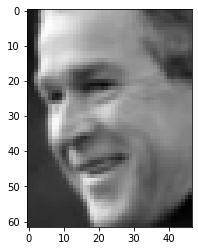

In [186]:
plt.imshow(imagenes[431], cmap='gray')

## Preguntas extra

(a) Prepara imágenes de los miembros del equipo ¿A quiénes se parecen?

(b) Utilizando los datos de _entrenamiento_ cuales son los valores máximo y mínimo en promedio de la distancia $E_j$. 

(c) Se dice lo siguiente:

_The input face is consider to belong to a class if εk is bellow an established threshold $\theta_\epsilon$. Then the face image is considered to be a known face. If the difference is above the given threshold, but bellow a second threshold, the image can be determined as a unknown face. If the input image is above these two thresholds, the image is determined NOT to be a face._

¿Se comprueba con las imágenes del equipo? ¿Qué pasa con imágenes que no son humanos?¿Y animales?

(d) Otra técnica que puede mejorar los resultados es restarle a todas las imágenes una _imagen promedio_ de _todas_ las imágenes antes de calcular $\mathcal{C}$. Repite los pasos ¿Cambia la matriz de confusión?

## Bibliografía

- [**Wikipedia**](http://en.wikipedia.org/wiki/Eigenface)
- [**Labeled Faces in the Wild (LFW) people dataset**](http://vis-www.cs.umass.edu/lfw/)
- **L. Sirovich and M. Kirby** (1987). _Low-dimensional procedure for the characterization of human faces_. `Journal of the Optical Society of America A 4 (3): 519–524`
- **M. Turk and A. Pentland** (1991). _Face recognition using eigenfaces_. `Proc. IEEE Conference on Computer Vision and Pattern Recognition. pp. 586–591.`
- **J. Nathan Kutz** (2013) _Data-Driven Modeling & Scientific Computation_ , `Oxford University Press` [link](http://dl.booktolearn.com/ebooks2/computer/computerscience/9780199660346_datadriven_modeling_and_scientific_computation_d739.pdf).